# Use SVM to predict PD

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import data for nonPD and early PD without Levadopa
dataSome = pd.read_csv("Imputed_data_Ivan.csv")
dataSome

,LLHold,LLLatency,LRHold,LRLatency,RLHold,RLLatency,RRHold,RRLatency,LLHoldStd,LLLatencyStd,...,RHoldSkew,RLatencySkew,LHoldKurt,LLatencyKurt,RHoldKurt,RLatencyKurt,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff,Parkinsons
0,97.654140,406.716242,107.138017,411.718182,100.917949,430.258974,96.400784,365.736471,25.840600,162.606085,...,7.402816,0.446804,0.805770,-0.699806,106.075763,-0.725689,-2.581164,40.979771,-18.540793,0
1,64.452941,390.058823,66.233333,600.433333,68.500000,536.407143,64.341176,394.647059,10.799197,199.162594,...,0.239309,-0.208674,-0.233988,-0.775209,-0.109231,-1.327965,1.156507,-4.588235,64.026190,0
2,143.399528,347.882547,105.325886,313.541489,163.700000,310.799454,106.208750,322.170833,51.115372,101.977747,...,2.804074,-0.115531,0.797792,0.285031,23.790534,-0.215556,47.072756,25.711714,2.742036,0
3,144.314980,528.670445,180.632743,575.478761,156.391710,501.274093,159.277778,493.779630,42.482348,137.542548,...,0.264594,-0.364617,0.595533,-0.409263,0.520341,-0.042387,-18.904747,34.890816,74.204668,0
4,124.285207,300.323155,127.421731,335.508287,125.795492,321.131506,124.941855,332.621036,21.626193,81.749015,...,0.353481,-0.024474,5.019808,-0.741563,5.034476,-0.901017,-1.202048,-32.297880,14.376781,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,74.382119,233.183499,71.242987,249.604979,76.069314,282.845343,75.168615,262.600722,15.847420,68.129255,...,8.103708,0.929794,11.708047,0.692850,103.310649,1.547799,1.842681,-29.417223,-33.240364,0
82,104.445555,284.901879,114.021725,215.023762,102.083155,255.127555,114.708130,271.448199,43.152219,144.554373,...,0.065245,1.584906,196.537883,1.271138,2.400487,3.098033,-10.969995,13.453680,-40.103793,0
83,103.366013,249.626144,141.265306,262.962245,104.287387,247.860360,147.900000,350.363077,24.085334,75.679672,...,-0.368180,-0.033922,5.034818,0.918322,2.103608,-1.017572,-40.157634,-100.736933,15.101885,1
84,147.086450,505.747519,147.248437,456.021354,146.607565,580.315603,136.493676,545.699209,32.984655,139.372280,...,2.553821,0.323904,1.404602,-0.693057,19.824505,-0.903855,3.895622,-39.951690,-124.294249,0


In [3]:
#We create X with all typing attributes in order to predict y, Parkinson's status.

X = dataSome.iloc[:,0:51]
y = dataSome.iloc[:,51]

In [4]:
X

,LLHold,LLLatency,LRHold,LRLatency,RLHold,RLLatency,RRHold,RRLatency,LLHoldStd,LLLatencyStd,...,LLatencySkew,RHoldSkew,RLatencySkew,LHoldKurt,LLatencyKurt,RHoldKurt,RLatencyKurt,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff
0,97.654140,406.716242,107.138017,411.718182,100.917949,430.258974,96.400784,365.736471,25.840600,162.606085,...,0.347884,7.402816,0.446804,0.805770,-0.699806,106.075763,-0.725689,-2.581164,40.979771,-18.540793
1,64.452941,390.058823,66.233333,600.433333,68.500000,536.407143,64.341176,394.647059,10.799197,199.162594,...,-0.400556,0.239309,-0.208674,-0.233988,-0.775209,-0.109231,-1.327965,1.156507,-4.588235,64.026190
2,143.399528,347.882547,105.325886,313.541489,163.700000,310.799454,106.208750,322.170833,51.115372,101.977747,...,-0.685049,2.804074,-0.115531,0.797792,0.285031,23.790534,-0.215556,47.072756,25.711714,2.742036
3,144.314980,528.670445,180.632743,575.478761,156.391710,501.274093,159.277778,493.779630,42.482348,137.542548,...,-0.034457,0.264594,-0.364617,0.595533,-0.409263,0.520341,-0.042387,-18.904747,34.890816,74.204668
4,124.285207,300.323155,127.421731,335.508287,125.795492,321.131506,124.941855,332.621036,21.626193,81.749015,...,0.284186,0.353481,-0.024474,5.019808,-0.741563,5.034476,-0.901017,-1.202048,-32.297880,14.376781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,74.382119,233.183499,71.242987,249.604979,76.069314,282.845343,75.168615,262.600722,15.847420,68.129255,...,0.919939,8.103708,0.929794,11.708047,0.692850,103.310649,1.547799,1.842681,-29.417223,-33.240364
82,104.445555,284.901879,114.021725,215.023762,102.083155,255.127555,114.708130,271.448199,43.152219,144.554373,...,1.146939,0.065245,1.584906,196.537883,1.271138,2.400487,3.098033,-10.969995,13.453680,-40.103793
83,103.366013,249.626144,141.265306,262.962245,104.287387,247.860360,147.900000,350.363077,24.085334,75.679672,...,0.959545,-0.368180,-0.033922,5.034818,0.918322,2.103608,-1.017572,-40.157634,-100.736933,15.101885
84,147.086450,505.747519,147.248437,456.021354,146.607565,580.315603,136.493676,545.699209,32.984655,139.372280,...,-0.006869,2.553821,0.323904,1.404602,-0.693057,19.824505,-0.903855,3.895622,-39.951690,-124.294249


In [5]:
y

0     0
1     0
2     0
3     0
4     1
     ..
81    0
82    0
83    1
84    0
85    1
Name: Parkinsons, Length: 86, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [7]:
#split the data between testing and training set
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

In [8]:
#CS is the list of soft margins we loop through
Cs = [.01,.1,.2,.3,.5,.75,5,10,50,100]

#make vectors for accuracy, precision and recall scores
acc_train = np.zeros(10)
acc_test = np.zeros(10)
prec_train = np.zeros(10)
prec_test = np.zeros(10)
rec_train = np.zeros(10)
rec_test = np.zeros(10)

#This is the loop over different soft margins. We make a pipeline with Standard Scaler and Linear SVC. 
#Train the pipeline on the testing data and then check scores on testing and store them in the corresponding vector.  

for i in range(len(Cs)):
    C = Cs[i]
    
    pipe = Pipeline([('scale',StandardScaler()),
                    ('svc',LinearSVC(C=C,loss="hinge",max_iter=200000))])
    pipe.fit(X_train0, y_train0.ravel())
    
    y_train_pred = pipe.predict(X_train0)
    y_test_pred = pipe.predict(X_test0)
    
    acc_train[i] = accuracy_score(y_train0, y_train_pred)
    acc_test[i] = accuracy_score(y_test0, y_test_pred)
    
    prec_train[i] = precision_score(y_train0, y_train_pred)
    prec_test[i] = precision_score(y_test0, y_test_pred)
    
    rec_train[i] = recall_score(y_train0, y_train_pred)
    rec_test[i] = recall_score(y_test0, y_test_pred)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

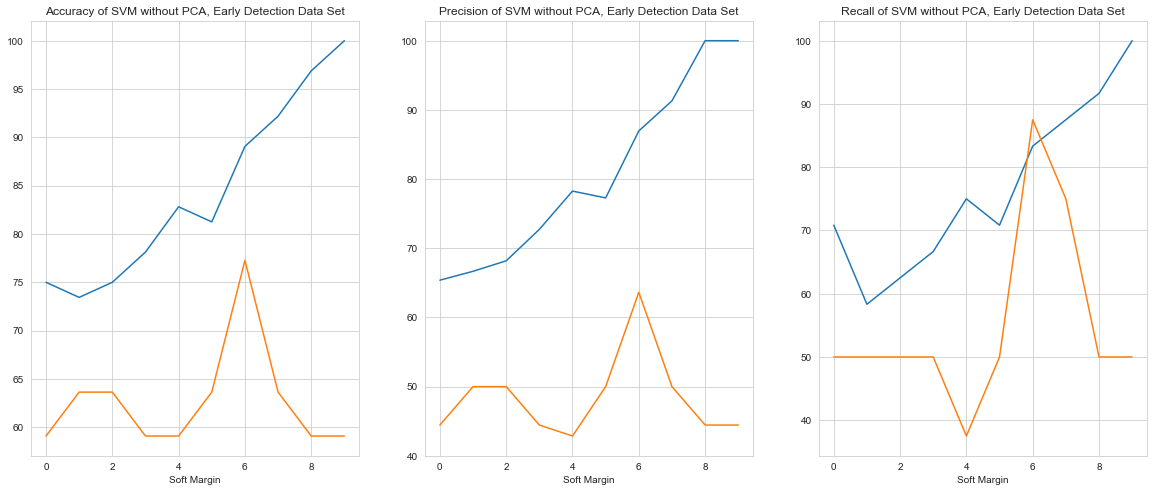

In [12]:
#Make a plot to visualize the outcomes for each soft margin in Cs. 
#The ticks on the x-axis represent the index of the soft margin in Cs.

sns.set_style("whitegrid")

fig, (accuracy_graph, precision_graph, recall_graph) = plt.subplots(1,3, figsize = (20,8))

accuracy_graph.plot(range(0,10), 100*acc_train, label = 'Training')
accuracy_graph.plot(range(0,10), 100*acc_test, label = 'Test')
accuracy_graph.set_title('Accuracy of SVM without PCA, Early Detection Data Set')
accuracy_graph.set_xlabel('Soft Margin')

precision_graph.plot(range(0,10), 100*prec_train, label = 'Training')
precision_graph.plot(range(0,10), 100*prec_test, label = 'Test')
precision_graph.set_title('Precision of SVM without PCA, Early Detection Data Set')
precision_graph.set_xlabel('Soft Margin')

recall_graph.plot(range(0,10), 100*rec_train, label = 'Training')
recall_graph.plot(range(0,10), 100*rec_test, label = 'Test')
recall_graph.set_title('Recall of SVM without PCA, Early Detection Data Set')
recall_graph.set_xlabel('Soft Margin')

plt.show()

In [27]:
#From the graphs above, the optimal soft margin appears to be C=5. Here we verify the actual scores. 

pipe = Pipeline([('scale',StandardScaler()),
                    ('svc',LinearSVC(C=5,loss="hinge",max_iter=200000))])
    
pipe.fit(X_train0, y_train0.ravel())
y_train_pred = pipe.predict(X_train0)
y_test_pred = pipe.predict(X_test0)

print("Testing accuracy for C=5 is:", accuracy_score(y_test0, y_test_pred))
 
print("Testing precision for C=5 is:", precision_score(y_test0, y_test_pred))

print("Testing recall for C=5 is:", recall_score(y_test0, y_test_pred))


Testing accuracy for C=5 is: 0.7727272727272727
Testing precision for C=5 is: 0.6363636363636364
Testing recall for C=5 is: 0.875


In [28]:
#Here we repeat with PCA added to the pipeline. This was done with varying n until the best was found.  

Cs = [.01,.1,.2,.3,.5,.75,5,10,50,100]

acc_train = np.zeros(10)
acc_test = np.zeros(10)
prec_train = np.zeros(10)
prec_test = np.zeros(10)
rec_train = np.zeros(10)
rec_test = np.zeros(10)

for i in range(len(Cs)):
    C = Cs[i]
    
    pipe = Pipeline([('scale',StandardScaler()),
                     ('PCA', PCA(n_components = 30)),
                    ('svc',LinearSVC(C=C,loss="hinge",max_iter=200000))])
    pipe.fit(X_train0, y_train0.ravel())
    
    y_train_pred = pipe.predict(X_train0)
    y_test_pred = pipe.predict(X_test0)
    
    acc_train[i] = accuracy_score(y_train0, y_train_pred)
    acc_test[i] = accuracy_score(y_test0, y_test_pred)
    
    prec_train[i] = precision_score(y_train0, y_train_pred)
    prec_test[i] = precision_score(y_test0, y_test_pred)
    
    rec_train[i] = recall_score(y_train0, y_train_pred)
    rec_test[i] = recall_score(y_test0, y_test_pred)

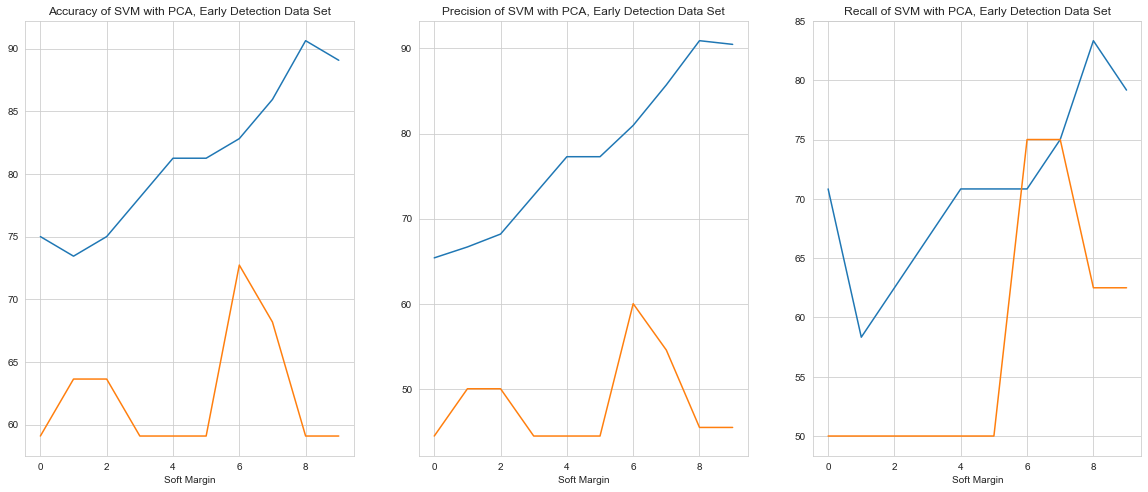

In [29]:
#Here we plot the results using the optimal number of PCA.

sns.set_style("whitegrid")

fig, (accuracy_graph, precision_graph, recall_graph) = plt.subplots(1,3, figsize = (20,8))

accuracy_graph.plot(range(0,10), 100*acc_train, label = 'Training')
accuracy_graph.plot(range(0,10), 100*acc_test, label = 'Test')
accuracy_graph.set_title('Accuracy of SVM with PCA, Early Detection Data Set')
accuracy_graph.set_xlabel('Soft Margin')

precision_graph.plot(range(0,10), 100*prec_train, label = 'Training')
precision_graph.plot(range(0,10), 100*prec_test, label = 'Test')
precision_graph.set_title('Precision of SVM with PCA, Early Detection Data Set')
precision_graph.set_xlabel('Soft Margin')

recall_graph.plot(range(0,10), 100*rec_train, label = 'Training')
recall_graph.plot(range(0,10), 100*rec_test, label = 'Test')
recall_graph.set_title('Recall of SVM with PCA, Early Detection Data Set')
recall_graph.set_xlabel('Soft Margin')

plt.show()

In [31]:
#From the graphs above, the optimal soft margin appears to be C=5. Here we verify the actual scores. 


pipe = Pipeline([('scale',StandardScaler()),
                     ('PCA', PCA(n_components = 30)),
                    ('svc',LinearSVC(C=5,loss="hinge",max_iter=200000))])
    
pipe.fit(X_train0, y_train0.ravel())
y_train_pred = pipe.predict(X_train0)
y_test_pred = pipe.predict(X_test0)

print("Testing accuracy for C=5 is:", accuracy_score(y_test0, y_test_pred))
 
print("Testing precision for C=5 is:", precision_score(y_test0, y_test_pred))

print("Testing recall for C=5 is:", recall_score(y_test0, y_test_pred))


Testing accuracy for C=5 is: 0.7272727272727273
Testing precision for C=5 is: 0.6
Testing recall for C=5 is: 0.75


In [32]:
#We repeat the analysis on the larger data set which includes all patients whose typing data was collecting.

dataAll = pd.read_csv("Imputed_ALLdata_Ivan.csv")

In [33]:
#These are the attributes we include in the analysis. 

columns = ['LLHold', 'LLLatency','LRHold', 'LRLatency', 'RLHold', 'RLLatency', 'RRHold', 'RRLatency', 
           'LLHoldStd', 'LLLatencyStd','LRHoldStd', 'LRLatencyStd', 'RLHoldStd', 'RLLatencyStd', 'RRHoldStd', 'RRLatencyStd',
           'LLHoldSkew', 'LLLatencySkew','LRHoldSkew', 'LRLatencySkew', 'RLHoldSkew', 'RLLatencySkew', 'RRHoldSkew', 'RRLatencySkew',
           'LLHoldKurt', 'LLLatencyKurt','LRHoldKurt', 'LRLatencyKurt', 'RLHoldKurt', 'RLLatencyKurt', 'RRHoldKurt', 'RRLatencyKurt', 
           'LHold', 'LLatency', 'RHold', 'RLatency', 'LHoldStd', 'LLatencyStd', 'RHoldStd', 'RLatencyStd',
           'LHoldSkew', 'LLatencySkew', 'RHoldSkew', 'RLatencySkew', 'LHoldKurt', 'LLatencyKurt', 'RHoldKurt', 'RLatencyKurt',
           'LRHold_Diff', 'LLRRLatency_Diff', 'LRRLLatency_Diff', 'Parkinsons']

dataAll = dataAll[columns]

In [34]:
#Print this data.

dataAll

,LLHold,LLLatency,LRHold,LRLatency,RLHold,RLLatency,RRHold,RRLatency,LLHoldStd,LLLatencyStd,...,RHoldSkew,RLatencySkew,LHoldKurt,LLatencyKurt,RHoldKurt,RLatencyKurt,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff,Parkinsons
0,82.169040,263.586377,81.946810,277.610541,74.671148,416.856331,79.294563,273.864624,19.181582,97.922659,...,4.130419,0.144135,11.532492,-1.160590,44.944694,-1.138668,-1.555339,-10.278246,-139.245790,1
1,97.654140,406.716242,107.138017,411.718182,100.917949,430.258974,96.400784,365.736471,25.840600,162.606085,...,7.495779,0.344506,0.859236,-0.736605,110.960777,-0.838186,-2.663930,40.979771,-18.540793,0
2,143.399528,347.882547,105.325886,313.541489,163.700000,310.799454,106.208750,322.170833,51.115372,101.977747,...,2.797976,-0.146722,0.625664,0.235101,24.142310,-0.177558,48.079984,25.711714,2.742036,0
3,87.418105,316.334084,95.753906,351.168548,91.759075,311.695939,87.046902,338.282118,23.427892,120.015100,...,0.508485,0.300325,7.209476,0.083280,2.216855,-0.447737,-1.529482,-21.948033,39.472609,1
4,81.947761,360.546269,88.875000,460.950000,78.100000,240.200000,83.886364,355.140909,22.325392,148.888718,...,-0.909756,-1.868409,2.090634,0.813987,2.232887,3.726850,-2.262416,5.405360,220.750000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,114.451691,380.816425,114.250244,378.445122,109.490793,322.538107,107.901394,379.116725,23.508236,144.463350,...,0.517080,0.608901,2.998890,0.452336,0.690160,0.117846,0.311773,1.699700,55.907015,1
187,109.729223,353.762243,110.151315,353.846670,114.032972,347.541292,108.025824,359.277471,24.825678,70.945323,...,1.528550,-0.396651,9.510130,-0.090862,14.220614,-0.231702,2.120533,-5.515228,6.305378,1
188,80.446667,288.293333,93.760000,353.140000,92.071429,403.742857,91.800000,314.466667,9.192222,76.566577,...,0.633140,-0.864134,4.508665,-0.414771,1.291153,0.341831,-6.379487,-26.173333,-50.602857,1
189,101.543809,158.094059,92.716100,153.591263,97.558775,142.231463,95.320305,169.229961,49.322681,79.887286,...,0.164271,1.357475,-0.191682,3.033984,-0.046371,1.663209,3.168687,-11.135901,11.359799,1


In [35]:
#Here we define X and y.

X = dataAll.iloc[:,0:51]
y = dataAll.iloc[:,51]

In [36]:
#Train and test split. 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

In [38]:
#Repeat SVM analysis on larger data set. 

Cs = [.01,.1,.2,.3,.5,.75,5,10,50,100]

acc_train = np.zeros(10)
acc_test = np.zeros(10)
prec_train = np.zeros(10)
prec_test = np.zeros(10)
rec_train = np.zeros(10)
rec_test = np.zeros(10)

for i in range(len(Cs)):
    C = Cs[i]
    
    pipe = Pipeline([('scale',StandardScaler()),
                    ('svc',LinearSVC(C=C,loss="hinge",max_iter=400000))])
    
    pipe.fit(X_train, y_train.ravel())
    
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    acc_train[i] = accuracy_score(y_train, y_train_pred)
    acc_test[i] = accuracy_score(y_test, y_test_pred)
    
    prec_train[i] = precision_score(y_train, y_train_pred)
    prec_test[i] = precision_score(y_test, y_test_pred)
    
    rec_train[i] = recall_score(y_train, y_train_pred)
    rec_test[i] = recall_score(y_test, y_test_pred)

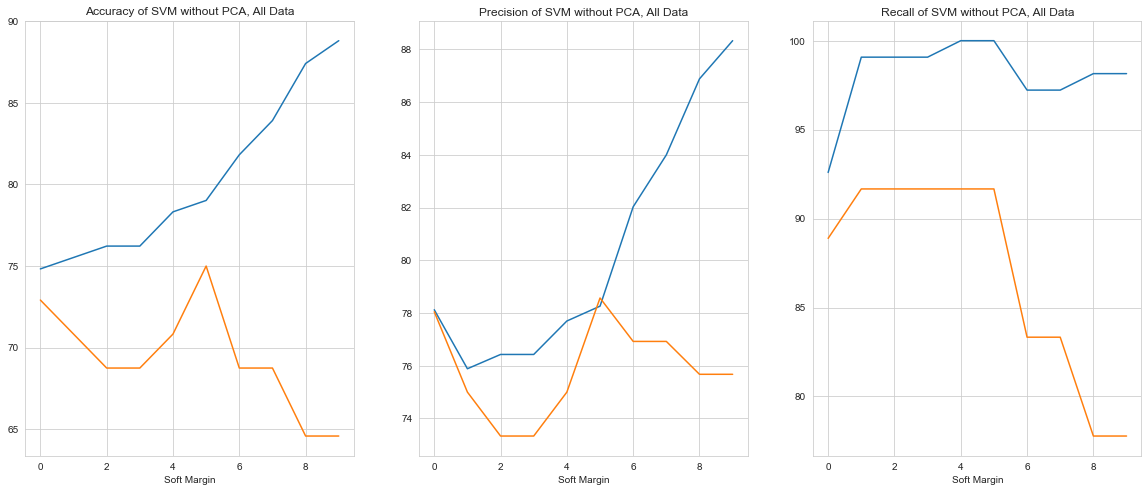

In [39]:
#Plot the result. 

sns.set_style("whitegrid")

fig, (accuracy_graph, precision_graph, recall_graph) = plt.subplots(1,3, figsize = (20,8))

accuracy_graph.plot(range(0,10), 100*acc_train, label = 'Training')
accuracy_graph.plot(range(0,10), 100*acc_test, label = 'Test')
accuracy_graph.set_title('Accuracy of SVM without PCA, All Data')
accuracy_graph.set_xlabel('Soft Margin')

precision_graph.plot(range(0,10), 100*prec_train, label = 'Training')
precision_graph.plot(range(0,10), 100*prec_test, label = 'Test')
precision_graph.set_title('Precision of SVM without PCA, All Data')
precision_graph.set_xlabel('Soft Margin')

recall_graph.plot(range(0,10), 100*rec_train, label = 'Training')
recall_graph.plot(range(0,10), 100*rec_test, label = 'Test')
recall_graph.set_title('Recall of SVM without PCA, All Data')
recall_graph.set_xlabel('Soft Margin')

plt.show()

In [40]:
#We repeat the analysis using PCA. n_components = 10 optimizes the outcome.

Cs = [.01,.1,.2,.3,.5,.75,5,10,50,100]

acc_train = np.zeros(10)
acc_test = np.zeros(10)
prec_train = np.zeros(10)
prec_test = np.zeros(10)
rec_train = np.zeros(10)
rec_test = np.zeros(10)

for i in range(len(Cs)):
    C = Cs[i]
    
    pipe = Pipeline([('scale',StandardScaler()),
                     ('PCA', PCA(n_components = 10)),
                    ('svc',LinearSVC(C=C,loss="hinge",max_iter=10000000))])
    pipe.fit(X_train, y_train.ravel())
    
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    acc_train[i] = accuracy_score(y_train, y_train_pred)
    acc_test[i] = accuracy_score(y_test, y_test_pred)
    
    prec_train[i] = precision_score(y_train, y_train_pred)
    prec_test[i] = precision_score(y_test, y_test_pred)
    
    rec_train[i] = recall_score(y_train, y_train_pred)
    rec_test[i] = recall_score(y_test, y_test_pred)

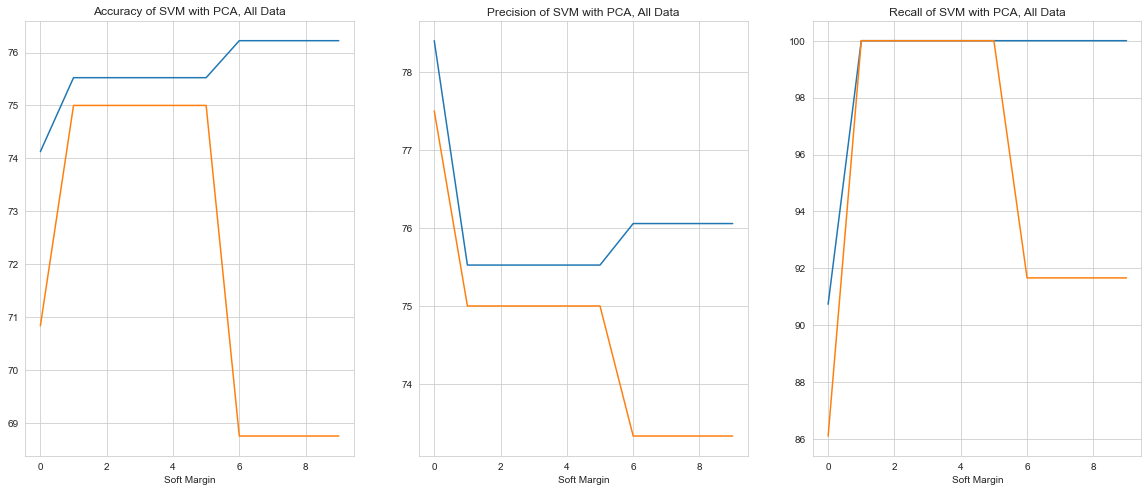

In [41]:
#Plot the results with PCA.

sns.set_style("whitegrid")

fig, (accuracy_graph, precision_graph, recall_graph) = plt.subplots(1,3, figsize = (20,8))

accuracy_graph.plot(range(0,10), 100*acc_train, label = 'Training')
accuracy_graph.plot(range(0,10), 100*acc_test, label = 'Test')
accuracy_graph.set_title('Accuracy of SVM with PCA, All Data')
accuracy_graph.set_xlabel('Soft Margin')

precision_graph.plot(range(0,10), 100*prec_train, label = 'Training')
precision_graph.plot(range(0,10), 100*prec_test, label = 'Test')
precision_graph.set_title('Precision of SVM with PCA, All Data')
precision_graph.set_xlabel('Soft Margin')

recall_graph.plot(range(0,10), 100*rec_train, label = 'Training')
recall_graph.plot(range(0,10), 100*rec_test, label = 'Test')
recall_graph.set_title('Recall of SVM with PCA, All Data')
recall_graph.set_xlabel('Soft Margin')

plt.show()